In [138]:
!pip install pingouin

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
from pingouin import ancova, pairwise_tukey
%matplotlib inline

In [140]:
print("SciPy: ", scipy.__version__)
print("Python: ", sys.version)

SciPy:  1.4.1
Python:  3.6.10 | packaged by conda-forge | (default, Apr 24 2020, 16:27:41) 
[GCC Clang 9.0.1 ]


In [141]:
cmpst = pd.read_csv('data/ETEE-compost.csv')

In [142]:
newc = cmpst.fillna(method='pad',axis=0)

In [143]:
newc

,Wrap #,wts before compost (g),wt after compost (g),Δ wt,% wt loss,average % wt loss for week,week #
0,1,2.6895,2.4600,0.2295,8.533185,7.410541,1.0
1,2,2.7211,2.5500,0.1711,6.287898,7.410541,1.0
2,3,2.6875,2.4000,0.2875,10.697674,12.238693,2.0
3,4,2.5748,2.2200,0.3548,13.779711,12.238693,2.0
4,5,2.3882,1.8600,0.5282,22.117076,18.655711,3.0
5,6,2.4055,2.0400,0.3655,15.194346,18.655711,3.0
6,7,2.4621,1.7400,0.7221,29.328622,26.522423,4.0
7,8,2.4907,1.9000,0.5907,23.716224,26.522423,4.0
8,9,2.8113,1.9200,0.8913,31.704194,23.908268,5.0
9,10,2.7060,2.2700,0.4360,16.112343,23.908268,5.0


In [144]:
#newc.drop(43,inplace=True)

In [145]:
#newc.loc[44,'average % wt loss for week'] = 100.0

In [146]:
newc['%weight'] = newc['% wt loss'].map(lambda x:100-x)

In [147]:
#newc.drop(42,inplace=True)
newc

,Wrap #,wts before compost (g),wt after compost (g),Δ wt,% wt loss,average % wt loss for week,week #,%weight
0,1,2.6895,2.4600,0.2295,8.533185,7.410541,1.0,91.466815
1,2,2.7211,2.5500,0.1711,6.287898,7.410541,1.0,93.712102
2,3,2.6875,2.4000,0.2875,10.697674,12.238693,2.0,89.302326
3,4,2.5748,2.2200,0.3548,13.779711,12.238693,2.0,86.220289
4,5,2.3882,1.8600,0.5282,22.117076,18.655711,3.0,77.882924
5,6,2.4055,2.0400,0.3655,15.194346,18.655711,3.0,84.805654
6,7,2.4621,1.7400,0.7221,29.328622,26.522423,4.0,70.671378
7,8,2.4907,1.9000,0.5907,23.716224,26.522423,4.0,76.283776
8,9,2.8113,1.9200,0.8913,31.704194,23.908268,5.0,68.295806
9,10,2.7060,2.2700,0.4360,16.112343,23.908268,5.0,83.887657


In [148]:
grouped = newc.groupby(by='week #',axis=0).mean()

In [149]:
grouped

,Wrap #,wts before compost (g),wt after compost (g),Δ wt,% wt loss,average % wt loss for week,%weight
week #,,,,,,,
1.0,1.5,2.70530,2.5050,0.20030,7.410541,7.410541,92.589459
2.0,3.5,2.63115,2.3100,0.32115,12.238693,12.238693,87.761307
3.0,5.5,2.39685,1.9500,0.44685,18.655711,18.655711,81.344289
4.0,7.5,2.47640,1.8200,0.65640,26.522423,26.522423,73.477577
5.0,9.5,2.75865,2.0950,0.66365,23.908268,23.908268,76.091732
6.0,16.0,2.33885,1.8700,0.46885,20.009090,20.009090,79.990910
7.0,13.5,2.40675,1.6950,0.71175,29.429313,29.429313,70.570687
8.0,15.5,2.54570,1.5600,0.98570,39.067354,39.067354,60.932646
9.0,15.0,2.37630,1.7450,0.63130,26.506928,26.506928,73.493072


In [150]:
plt.style.use(['seaborn-white', 'seaborn-paper'])

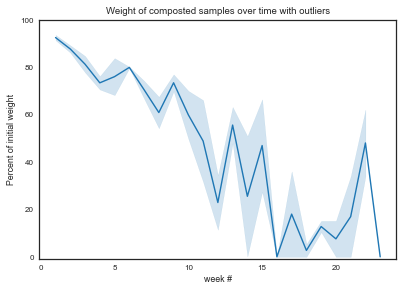

In [151]:
ax = sns.lineplot(x='week #', y='%weight', data = newc)

ax.set_title("Weight of composted samples over time with outliers")
ax.set_ylabel("Percent of initial weight")
ax.set_ylim(-1,100)
ax.set_xticks(range(0,22,5))

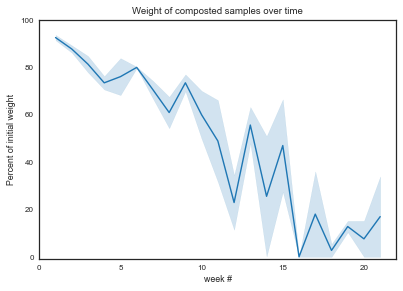

In [152]:
ax = sns.lineplot(x="week #", y="%weight", data=newc.drop([42,43,44]))
ax.set_title("Weight of composted samples over time")
ax.set_ylabel("Percent of initial weight")
ax.set_ylim(-1,100)
ax.set_xticks(range(0,22,5))

(-1.0, 100.0)

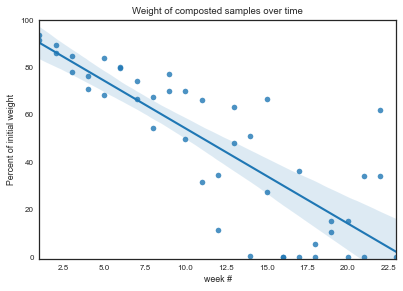

In [153]:
ax = sns.regplot(x="week #", y="%weight", data=newc)
ax.set_title("Weight of composted samples over time")
ax.set_ylabel("Percent of initial weight")
ax.set_ylim(-1,100)

(-1.0, 100.0)

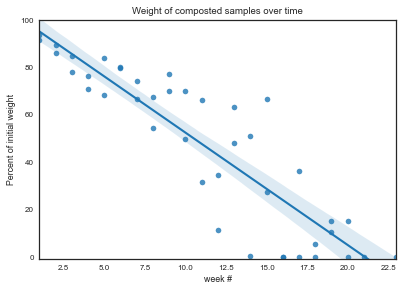

In [154]:
ax = sns.regplot(x="week #", y="%weight", data=newc.drop([40,42,43]))
ax.set_title("Weight of composted samples over time")
ax.set_ylabel("Percent of initial weight")
ax.set_ylim(-1,100)

Text(0, 0.5, 'Percent of initial weight')

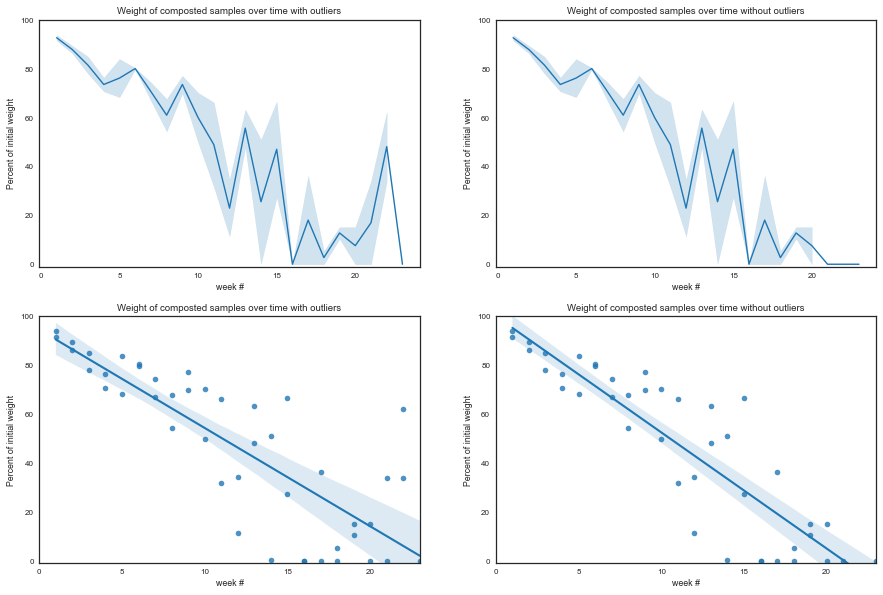

In [155]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)

sns.lineplot(ax=axs[0,0],x='week #', y='%weight', data = newc)
axs[0,0].set_title("Weight of composted samples over time with outliers")
axs[0,0].set_xticks(range(0,22,5))
axs[0,0].set_ylim(-1,100)
axs[0,0].set_ylabel("Percent of initial weight")

sns.lineplot(ax=axs[0,1],x="week #", y="%weight", data=newc.drop([40,42,43]))
axs[0,1].set_title("Weight of composted samples over time without outliers")
axs[0,1].set_xticks(range(0,22,5))
axs[0,1].set_ylim(-1,100)
axs[0,1].set_ylabel("Percent of initial weight")

sns.regplot(ax=axs[1,0],x="week #", y="%weight", data=newc)
axs[1,0].set_title("Weight of composted samples over time with outliers")
axs[1,0].set_xticks(range(0,22,5))
axs[1,0].set_ylim(-1,100)
axs[1,0].set_ylabel("Percent of initial weight")

sns.regplot(ax=axs[1,1],x="week #", y="%weight", data=newc.drop([40,42,43]))
axs[1,1].set_title("Weight of composted samples over time without outliers")
axs[1,1].set_xticks(range(0,22,5))
axs[1,1].set_ylim(-1,100)
axs[1,1].set_ylabel("Percent of initial weight")

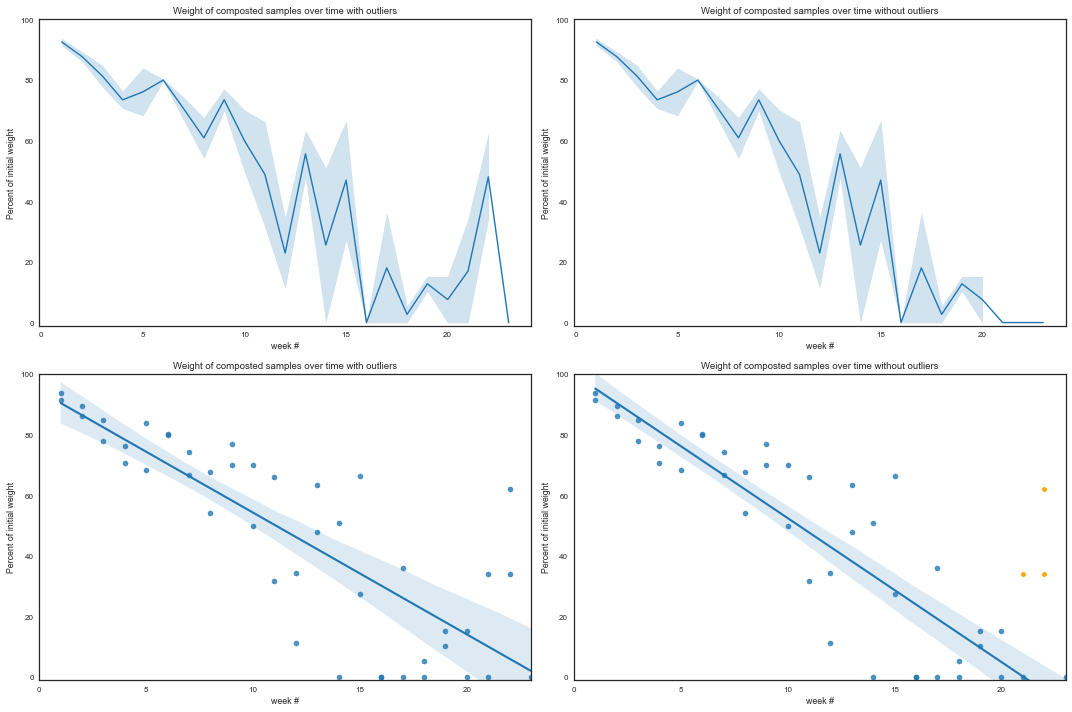

In [156]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)

sns.lineplot(ax=axs[0,0],x='week #', y='%weight', data = newc)
axs[0,0].set_title("Weight of composted samples over time with outliers")
axs[0,0].set_xticks(range(0,22,5))
axs[0,0].set_ylim(-1,100)
axs[0,0].set_ylabel("Percent of initial weight")

sns.lineplot(ax=axs[0,1],x="week #", y="%weight", data=newc.drop([40,42,43]))
axs[0,1].set_title("Weight of composted samples over time without outliers")
axs[0,1].set_xticks(range(0,22,5))
axs[0,1].set_ylim(-1,100)
axs[0,1].set_ylabel("Percent of initial weight")

sns.regplot(ax=axs[1,0],x="week #", y="%weight", data=newc)
axs[1,0].set_title("Weight of composted samples over time with outliers")
axs[1,0].set_xticks(range(0,22,5))
axs[1,0].set_ylim(-1,100)
axs[1,0].set_ylabel("Percent of initial weight")

sns.regplot(ax=axs[1,1],x="week #", y="%weight", data=newc.drop([40,42,43]))
sns.scatterplot(ax=axs[1,1], x="week #", y="%weight", data=newc.loc[[40,42,43]], color='orange')
axs[1,1].set_title("Weight of composted samples over time without outliers")
axs[1,1].set_xticks(range(0,22,5))
axs[1,1].set_ylim(-1,100)
axs[1,1].set_ylabel("Percent of initial weight")


plt.tight_layout()
plt.savefig("composting-weight.jpg")

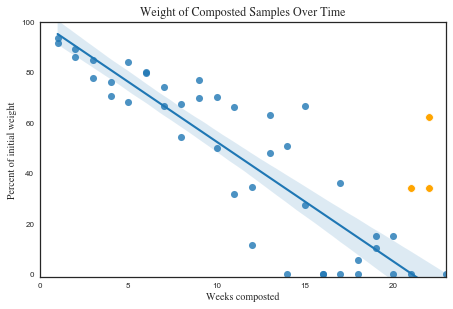

In [157]:
ax = sns.regplot(x="week #", y="%weight", data=newc.drop([40,42,43]),scatter_kws={"s": 50})
ax = sns.scatterplot(ax=ax, x="week #", y="%weight", data=newc.loc[[40,42,43]], color='orange',s=60)

ax.set_title("Weight of Composted Samples Over Time", fontsize="large", fontfamily="times")
ax.set_xticks(range(0,22,5))
ax.set_ylim(-1,100)
ax.set_ylabel("Percent of initial weight", fontsize="medium", fontfamily="times")
ax.set_xlabel("Weeks composted",fontsize="medium", fontfamily="times")

#plt.gcf().set_size_inches(16,8)
plt.tight_layout()
plt.savefig("composting-weight-single.jpg")
plt.savefig("composting-weight-single.svg")

In [158]:
from scipy.stats import linregress

In [159]:
x_1, y_1 = newc.drop([40,42,43])["week #"], newc.drop([40,42,43])["%weight"]

In [160]:
slope, intercept, r_value, p_value, std_err = linregress(x_1,y_1)

In [161]:
print("slope:", slope)
print("intercept:", intercept)
print("r squared:", r_value**2)
print("p_value:", p_value)
print("std_err:", std_err)

slope: -4.747923342833775
intercept: 99.94760871052077
r squared: 0.7971853631223856
p_value: 1.9355669494240303e-15
std_err: 0.37865499649406464


# Washing

In [162]:
washing = pd.read_csv("data/ETEE-washing.csv")

In [163]:
washing

,Wash # (A and B),A1,A1 %Δ wt,A2,A2 %Δ wt,A avg %Δwt,B1,B1 %Δ wt,B2,B2 %Δ wt,B avg %Δwt,C1,C1 %Δ wt,C2,C2 %Δ wt,C avg %Δ wt,Wash # (C)
0,0,4.60,0.000000,4.25,0.000000,0.000000,4.12,0.000000,4.81,0.000000,0.000000,-,-,-,-,-,-
1,1,4.60,0.000000,4.15,2.352941,1.176471,4.04,1.941748,4.66,3.118503,2.530125,-,-,-,-,-,-
2,2,4.49,2.391304,4.15,2.352941,2.372123,4.03,2.184466,4.66,3.118503,2.651485,6.08,0,6.02,0,0,0
3,3,4.51,1.956522,4.18,1.647059,1.801790,4.06,1.456311,4.70,2.286902,1.871606,5.98,1.644736842,6.03,-0.166112957,0.739311943,1
4,4,4.50,2.173913,4.16,2.117647,2.145780,4.06,1.456311,4.68,2.702703,2.079507,5.94,2.302631579,6,0.332225914,1.317428746,2
5,5,4.57,0.652174,4.20,1.176471,0.914322,4.10,0.485437,4.73,1.663202,1.074319,5.98,1.644736842,6.01,0.166112957,0.905424899,3
6,6,4.45,3.260870,4.10,3.529412,3.395141,4.02,2.427184,4.64,3.534304,2.980744,5.87,3.453947368,5.93,1.495016611,2.47448199,4
7,7,4.45,3.260870,4.11,3.294118,3.277494,4.03,2.184466,4.65,3.326403,2.755435,5.89,3.125,5.94,1.328903654,2.226951827,5
8,8,4.42,3.913043,4.10,3.529412,3.721228,4.00,2.912621,4.63,3.742204,3.327413,5.86,3.618421053,5.93,1.495016611,2.556718832,6
9,9,4.41,4.130435,4.09,3.764706,3.947570,4.00,2.912621,4.63,3.742204,3.327413,5.87,3.453947368,5.91,1.827242525,2.640594947,7


In [164]:
washing_new = washing.loc[:,["A1","A2","B1","B2","C1","C2","Wash # (A and B)"]]

In [165]:
washing_new["C1"] = washing.loc[2:,"C1"].reset_index(drop=True)
washing_new["C2"] = washing.loc[2:,"C2"].reset_index(drop=True)
washing_new.rename({"Wash # (A and B)":"Wash #"},axis=1,inplace=True)

In [166]:
washing_new

,A1,A2,B1,B2,C1,C2,Wash #
0,4.60,4.25,4.12,4.81,6.08,6.02,0
1,4.60,4.15,4.04,4.66,5.98,6.03,1
2,4.49,4.15,4.03,4.66,5.94,6,2
3,4.51,4.18,4.06,4.70,5.98,6.01,3
4,4.50,4.16,4.06,4.68,5.87,5.93,4
5,4.57,4.20,4.10,4.73,5.89,5.94,5
6,4.45,4.10,4.02,4.64,5.86,5.93,6
7,4.45,4.11,4.03,4.65,5.87,5.91,7
8,4.42,4.10,4.00,4.63,5.84,5.92,8
9,4.41,4.09,4.00,4.63,NaN,NaN,9


In [167]:
for col in washing_new.drop("Wash #", axis = 1).columns:
    washing_new[col+" % initial"] = washing_new[col].apply(lambda x: float(x)/float(washing_new[col][0]))

In [168]:
washing_new

,A1,A2,B1,B2,C1,C2,Wash #,A1 % initial,A2 % initial,B1 % initial,B2 % initial,C1 % initial,C2 % initial
0,4.60,4.25,4.12,4.81,6.08,6.02,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,4.60,4.15,4.04,4.66,5.98,6.03,1,1.000000,0.976471,0.980583,0.968815,0.983553,1.001661
2,4.49,4.15,4.03,4.66,5.94,6,2,0.976087,0.976471,0.978155,0.968815,0.976974,0.996678
3,4.51,4.18,4.06,4.70,5.98,6.01,3,0.980435,0.983529,0.985437,0.977131,0.983553,0.998339
4,4.50,4.16,4.06,4.68,5.87,5.93,4,0.978261,0.978824,0.985437,0.972973,0.965461,0.985050
5,4.57,4.20,4.10,4.73,5.89,5.94,5,0.993478,0.988235,0.995146,0.983368,0.968750,0.986711
6,4.45,4.10,4.02,4.64,5.86,5.93,6,0.967391,0.964706,0.975728,0.964657,0.963816,0.985050
7,4.45,4.11,4.03,4.65,5.87,5.91,7,0.967391,0.967059,0.978155,0.966736,0.965461,0.981728
8,4.42,4.10,4.00,4.63,5.84,5.92,8,0.960870,0.964706,0.970874,0.962578,0.960526,0.983389
9,4.41,4.09,4.00,4.63,NaN,NaN,9,0.958696,0.962353,0.970874,0.962578,NaN,NaN


In [169]:
anova_df = washing_new.loc[:,"Wash #":].melt(id_vars="Wash #")

In [170]:
anova_df.rename({"Wash #": "Washes"}, axis=1, inplace=True)

In [171]:
anova_df.dropna(inplace=True)

In [172]:
anova_df["Washes +1"] = anova_df["Washes"].apply(lambda x: x+1)

In [173]:
anova_df["Group"] = anova_df["variable"].apply(lambda x: x[0])

In [174]:
anova_df.head()

,Washes,variable,value,Washes +1,Group
0,0,A1 % initial,1.000000,1,A
1,1,A1 % initial,1.000000,2,A
2,2,A1 % initial,0.976087,3,A
3,3,A1 % initial,0.980435,4,A
4,4,A1 % initial,0.978261,5,A


In [175]:
ancov = ancova(data=anova_df, dv='value', covar='Washes', between='Group')

In [176]:
ancov

,Source,SS,DF,F,p-unc,np2
0,Group,0.000175,2,1.084162,3.449389e-01,0.036038
1,Washes,0.005486,1,67.858264,2.451024e-11,0.539164
2,Residual,0.004689,58,NaN,NaN,NaN


# Wax Transfer

In [177]:
wax = pd.read_csv("data/ETEE-transfer.csv")

In [178]:
wax

,# of transfers,heat,heat % change,room temp,room temp % change,cold,cold % change
0,0,12.1605,NaN,17.9732,NaN,18.29,NaN
1,1,11.9700,-1.566547,17.9900,0.093473,18.28,-0.054675
2,2,12.1300,-0.250812,18.0200,0.260388,18.34,0.273373
3,3,11.9000,-2.142182,17.9700,-0.017804,18.28,-0.054675
4,4,11.9100,-2.059948,18.0000,0.149111,18.29,0.000000
5,5,11.9200,-1.977715,18.0100,0.204749,18.25,-0.218699
6,6,12.1000,-0.497512,18.0300,0.316026,18.32,0.164024
7,7,11.9100,-2.059948,17.9800,0.037834,18.26,-0.164024
8,8,11.8700,-2.388882,18.0200,0.260388,18.23,-0.328048
9,9,11.9700,-1.566547,18.0200,0.260388,18.34,0.273373


In [179]:
wax_melted = wax.loc[:,["# of transfers", "heat % change", "room temp % change", "cold % change"]].melt("# of transfers")

In [180]:
wax_melted.fillna(0,inplace=True)

In [181]:
ancova(data=wax_melted, dv='value', covar='# of transfers', between='variable')

,Source,SS,DF,F,p-unc,np2
0,variable,15.619254,2,29.504071,2.049589e-07,0.694147
1,# of transfers,0.472639,1,1.785589,1.930425e-01,0.064263
2,Residual,6.882112,26,NaN,NaN,NaN


In [182]:
wax_melted["Treatment"] = wax_melted["variable"].apply(lambda x: x.split(" %")[0])
wax_melted.rename({"value": "Percent weight change"}, axis=1, inplace=True)

In [183]:
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')

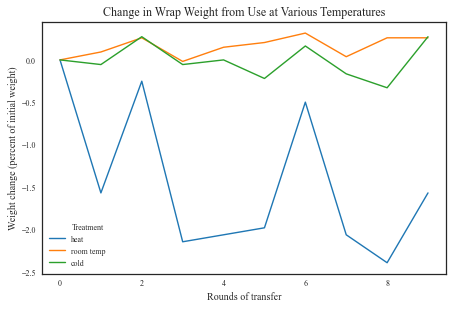

In [184]:
ax = sns.lineplot(x="# of transfers",
                  y="Percent weight change",
                  hue="Treatment",
                  data=wax_melted)
ax.set_ylabel("Weight change (percent of initial weight)", fontsize="medium")
ax.set_xlabel("Rounds of transfer", fontsize="medium")
ax.set_title("Change in Wrap Weight from Use at Various Temperatures", fontsize="large")
plt.tight_layout()
plt.savefig("transfer-weight.jpg")
plt.savefig("transfer-weight.svg")

In [185]:
wax_melted.pairwise_tukey(dv="Percent weight change",
                          between="Treatment")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,cold,heat,-0.010935,-1.451009,1.440074,0.233409,6.169754,0.001000,2.642612
1,cold,room temp,-0.010935,0.156455,-0.167390,0.233409,-0.717154,0.740857,-0.307170
2,heat,room temp,-1.451009,0.156455,-1.607465,0.233409,-6.886908,0.001000,-2.949782


# Images

In [186]:
import matplotlib.image as mpimg

In [187]:
reg1 = mpimg.imread('images/ETEE_10Areg_before.jpg')
reg2 = mpimg.imread('images/ETEE_8Areg_after.jpg')
reg3 = mpimg.imread('images/ETEE_16Areg_after.jpg')
reg4 = mpimg.imread('images/ETEE_23Areg_after.jpg')
reg5 = mpimg.imread('images/ETEE_32Breg_after.jpg')

uv1 = mpimg.imread('images/ETEE_10A_before.jpg')
uv2 = mpimg.imread('images/ETEE_8A_after.jpg')
uv3 = mpimg.imread('images/ETEE_16A_after.jpg')
uv4 = mpimg.imread('images/ETEE_23A_after.jpg')
uv5 = mpimg.imread('images/ETEE_32A_after.jpg')

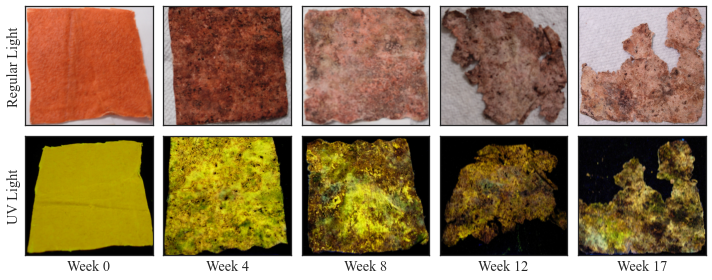

In [188]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))
axes[0,0].imshow(reg1, aspect='auto')
axes[0,0].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[0,1].imshow(reg2, aspect='auto')
axes[0,1].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[0,2].imshow(reg3, aspect='auto')
axes[0,2].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[0,3].imshow(reg4, aspect='auto')
axes[0,3].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[0,4].imshow(reg5, aspect='auto')
axes[0,4].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1,0].imshow(uv1, aspect='auto')
axes[1,0].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1,1].imshow(uv2, aspect='auto')
axes[1,1].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1,2].imshow(uv3, aspect='auto')
axes[1,2].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1,3].imshow(uv4, aspect='auto')
axes[1,3].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1,4].imshow(uv5, aspect='auto')
axes[1,4].tick_params(axis="both", labelbottom=False, labelleft=False)
left,right = axes[1,3].get_xlim() 
axes[1,4].set_xlim(right, left)


axes[1,0].set_xlabel("Week 0", fontsize="x-large")
axes[1,1].set_xlabel("Week 4", fontsize="x-large")
axes[1,2].set_xlabel("Week 8", fontsize="x-large")
axes[1,3].set_xlabel("Week 12", fontsize="x-large")
axes[1,4].set_xlabel("Week 17", fontsize="x-large")

axes[0,0].set_ylabel("Regular Light", fontsize="x-large")
axes[1,0].set_ylabel("UV Light", fontsize="x-large")

plt.tight_layout()
plt.savefig("compost-pictures.jpg")
plt.savefig("compost-pictures.svg")
plt.savefig("compost-pictures.pdf")

In [189]:
transfer1 = mpimg.imread('images/transfer_1.jpg')
transfer6 = mpimg.imread('images/transfer_6.jpg')

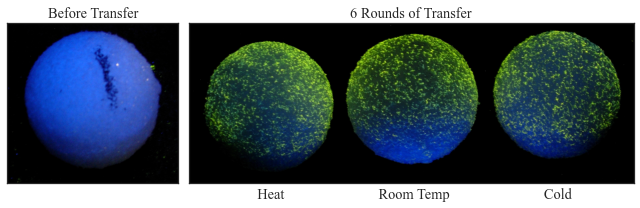

In [190]:
fig, axes = plt.subplots(1, 2, figsize=(9,3), gridspec_kw={"width_ratios":[1,2.6]})

axes[0].imshow(transfer1)
axes[0].tick_params(axis="both", labelbottom=False, labelleft=False)
axes[0].set_title("Before Transfer", fontsize="x-large")

axes[1].imshow(transfer6)
axes[1].tick_params(axis="both", labelbottom=False, labelleft=False)
axes[1].set_title("6 Rounds of Transfer", fontsize="x-large")
axes[1].set_xlabel("  Heat                          Room Temp                          Cold", fontsize="x-large")

plt.tight_layout()
plt.savefig("transfer-pics.jpg")
plt.savefig("transfer-pics.svg")

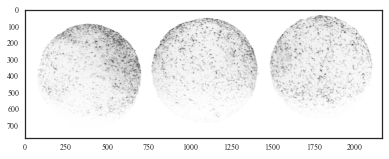

In [191]:
plt.imshow(transfer6[:,:,0])

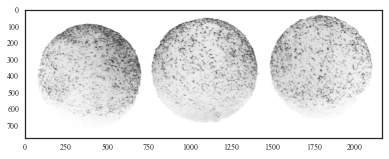

In [192]:
plt.imshow(transfer6[:,:,1])

In [193]:
bases = mpimg.imread("images/acidbase1.png")[20:-35]
acids = mpimg.imread("images/acidbase2.png")

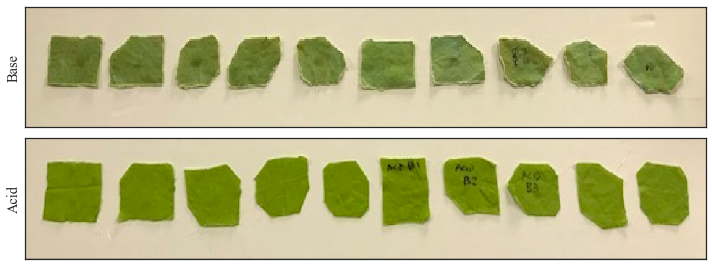

In [194]:
fig, axes = plt.subplots(2, 1, figsize=(10,3.8)) 
                         #gridspec_kw={"width_ratios":[1,2.6]})
axes[0].imshow(bases,interpolation='nearest', aspect='auto')
axes[0].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[1].imshow(acids, interpolation='nearest', aspect='auto')
axes[1].tick_params(axis="both", labelbottom=False, labelleft=False)

axes[0].set_ylabel("Base",fontsize="x-large")
axes[1].set_ylabel("Acid",fontsize="x-large")
plt.tight_layout()

plt.savefig("Acid-Base.jpg")
plt.savefig("Acid-Base.svg")